# get started classifying stuff with scikit-learn

we'll import some stuff, and then use cross-validation to test it.

First, we'll load up some data, then we'll set up a classifier.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# copy/pasted function to load the book's data 
def load_dataset(path, dataset_name):
    '''
    data,labels = load_dataset(dataset_name)

    Load a given dataset

    Returns
    -------
    data : numpy ndarray
    labels : list of str
    '''
    data = []
    labels = []
    with open('{}/{}.tsv'.format(path, dataset_name)) as ifile:
        for line in ifile:
            tokens = line.strip().split('\t')
            data.append([float(tk) for tk in tokens[:-1]])
            labels.append(tokens[-1])
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# load the data
features, labels = load_dataset("book/ch02/data", "seeds")

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
#classifier = KNeighborsClassifier(n_neighbors=1)  # default is 5

# normalize data first, using a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



Mean accuracy: 84.7%


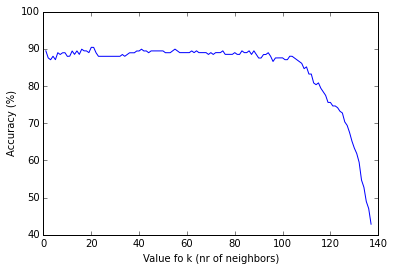

In [34]:
classifier = KNeighborsClassifier()
pipeline = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

# accuracies for various values of k
ks = np.arange(1,138)
accuracies = []

for k in ks:
    classifier.set_params(n_neighbors=k)
    crossed = cross_val_score(classifier, features, labels)
    accuracies.append(crossed.mean())
accuracies = np.array(accuracies)

mean_accuracy = np.mean(accuracies)    
print("Mean accuracy: {:.1%}".format(mean_accuracy))

# plot this info
plt.plot(ks, accuracies * 100)
plt.xlabel("Value fo k (nr of neighbors)")
plt.ylabel("Accuracy (%)")

Means: [0.9285714285714286, 0.95238095238095233, 0.9285714285714286, 0.9285714285714286, 0.95238095238095233]
Mean accuracy: 93.8%


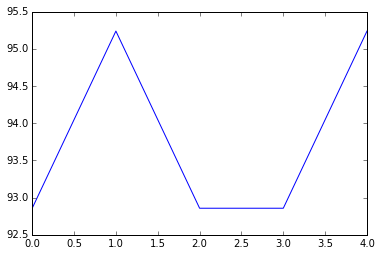

In [44]:
# now we'll do the cross-validation via scikit learn's tools
from sklearn.cross_validation import KFold

classifier = KNeighborsClassifier(n_neighbors=1)
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

kf = KFold(len(features), n_folds=5, shuffle=True)
means = []  # list of mean accuracies, one per fold
for training, testing in kf:
    
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])
    
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)

mean_accuracy = np.mean(means) 
print("Means: {}".format(means))
print("Mean accuracy: {:.1%}".format(mean_accuracy))
plt.plot([m * 100 for m in means])


In [45]:
# simpler approach... 
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])
crossed = cross_val_score(classifier, features, labels)
print('Result with prescaling: {}'.format(crossed))

Result with prescaling: [ 0.95833333  0.92753623  0.79710145]


In [47]:
from sklearn.metrics import confusion_matrix
names = list(set(labels))
labels = np.array([names.index(ell) for ell in labels])
preds = labels.copy()
preds[:] = -1
for train, test in kf:
    classifier.fit(features[train], labels[train])
    preds[test] = classifier.predict(features[test])

cmat = confusion_matrix(labels, preds)
print('Confusion matrix: [rows represent true outcome, columns predicted outcome]')
print(cmat)

acc = cmat.trace() / cmat.sum()
print('Accuracy: {0:.1%}'.format(acc))

Confusion matrix: [rows represent true outcome, columns predicted outcome]
[[67  0  3]
 [ 0 66  4]
 [ 5  1 64]]
Accuracy: 93.8%
